In [1]:
# ====================================
# ANN Scratch Implementation for XOR
# ====================================
import math
import random
import matplotlib.pyplot as plt
import os

print("=== ANN Scratch Implementation ===")
os.makedirs("images", exist_ok=True)

# Helper functions
def sigmoid(x): return 1/(1+math.exp(-x))
def sigmoid_derivative(x): return x*(1-x)
def init_matrix(rows, cols): return [[random.uniform(-1,1) for _ in range(cols)] for _ in range(rows)]

# Dataset and parameters
X = [[0,0],[0,1],[1,0],[1,1]]
y = [[0],[1],[1],[0]]
input_size, hidden_size, output_size = 2, 2, 1
lr, epochs = 0.5, 5000

W1 = init_matrix(input_size, hidden_size)
b1 = [0]*hidden_size
W2 = init_matrix(hidden_size, output_size)
b2 = [0]*output_size

# Forward pass
def forward_pass(sample):
    hidden = [sigmoid(sum(sample[i]*W1[i][j] for i in range(input_size)) + b1[j]) for j in range(hidden_size)]
    output = [sigmoid(sum(hidden[i]*W2[i][j] for i in range(hidden_size)) + b2[j]) for j in range(output_size)]
    return hidden, output

# Day 1: Forward pass outputs
print("Day 1: Forward pass outputs")
for sample in X:
    _, out = forward_pass(sample)
    print(f"Input: {sample}, Output: {out}")


=== ANN Scratch Implementation ===
Forward pass outputs
Input: [0, 0], Output: [0.6954228231032096]
Input: [0, 1], Output: [0.7244558388427217]
Input: [1, 0], Output: [0.7032918308991]
Input: [1, 1], Output: [0.7317008204309753]


In [3]:
# ====================================
# ANN Training Loop
# ====================================
print("Training loop started")
for epoch in range(epochs):
    for i in range(len(X)):
        hidden, out = forward_pass(X[i])
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j])*sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        
        for j in range(hidden_size):
            for k in range(output_size):
                W2[j][k] += lr*delta_out[k]*hidden[j]
        for j in range(output_size):
            b2[j] += lr*delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size):
                W1[j][k] += lr*delta_hidden[k]*X[i][j]
        for j in range(hidden_size):
            b1[j] += lr*delta_hidden[j]

print("Training completed")


Training loop started
Training completed


In [4]:
# ====================================
# ANN Predictions After Training
# ====================================
print("Predictions after training")
for sample in X:
    _, out = forward_pass(sample)
    print(f"Input: {sample}, Output: {out}")


Predictions after training
Input: [0, 0], Output: [0.019434699622773954]
Input: [0, 1], Output: [0.9833341290947769]
Input: [1, 0], Output: [0.983174959517643]
Input: [1, 1], Output: [0.017416279474971152]


In [5]:
# ====================================
# ANN Modularized Functions & Loss
# ====================================
def train_one_epoch(X, y):
    for i in range(len(X)):
        hidden, out = forward_pass(X[i])
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j])*sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        for j in range(hidden_size):
            for k in range(output_size): W2[j][k] += lr*delta_out[k]*hidden[j]
        for j in range(output_size): b2[j] += lr*delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size): W1[j][k] += lr*delta_hidden[k]*X[i][j]
        for j in range(hidden_size): b1[j] += lr*delta_hidden[j]

def compute_loss(X, y):
    loss = 0
    for i in range(len(X)):
        _, out = forward_pass(X[i])
        loss += (y[i][0] - out[0])**2
    return loss/len(X)

print("Loss after training:", compute_loss(X, y))


Loss after training: 0.0003104668951100662


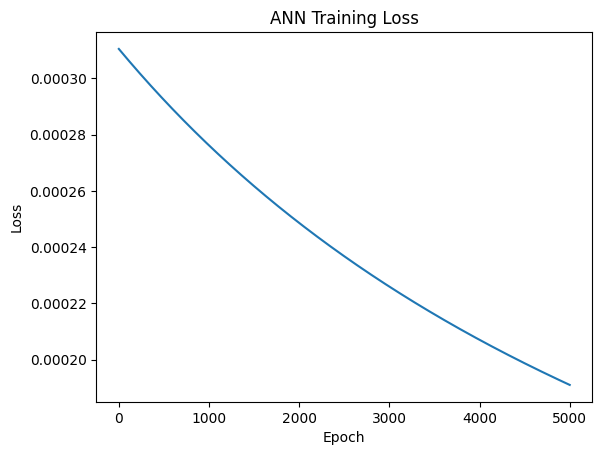

In [6]:
# ====================================
# ANN Visualization (Auto Save)
# ====================================
losses = []
for epoch in range(epochs):
    train_one_epoch(X, y)
    losses.append(compute_loss(X, y))

plt.plot(losses)
plt.title("ANN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("images/ann_training_loss.png")
plt.show()

